In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from utils import Videos
%matplotlib inline


import itertools
def confusion_matrix_plot(cm, classes, 
                          title='Normalized Confusion Matrix', 
                          normalize=False, 
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Using TensorFlow backend.


In [2]:
# Changed the sequence of the classes
benchmark_cnf_matrix = [
    [0.80, 0.05, 0.00, 0.0, 0.0, 0.00], 
    [0.254, 1.00, 0.015, 0.0, 0.0, 0.014], 
    [0.108, 0.049, 0.84, 0.0, 0.0, 0.03], 
    [0.0, 0.0, 0.0, 0.81, 0.167, 0.229], 
    [0.0, 0.0, 0.0, 0.389, 0.82, 0.063], 
    [0.0, 0.0, 0.0, 0.162, 0.0, 0.98]
]

benchmark_cnf_matrix = np.array(benchmark_cnf_matrix)

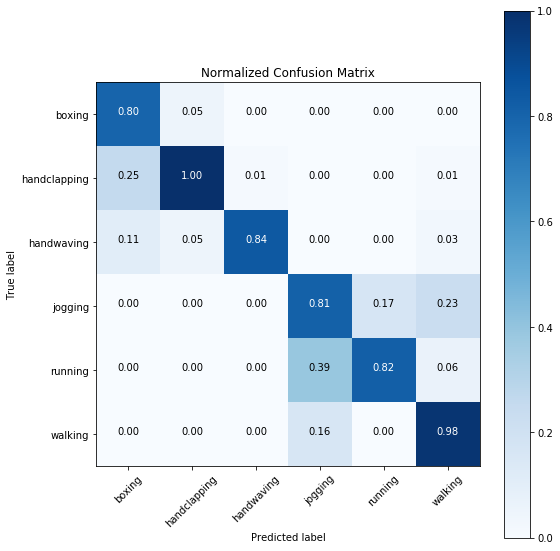

In [3]:
# Plotting the Confusion matrix of the Benchmark Model
confusion_matrix_plot(benchmark_cnf_matrix, 
                      classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'])

In [ ]:
# Loading the model that performed the best on the validation set
from keras.models import Sequential
model = Sequential()
model.load_weights('E://Model_Weights//Model_weights.best.hdf5')

In [1]:
import matplotlib
matplotlib.use("Agg")

from imutils import paths
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
import cv2
import random
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [43]:
# train and test
# load images

import os
def load_data2(path):
    print("[INFO] loading images...")
    data = []
    labels = []
    # grab the image paths and randomly shuffle them
    imagePaths = sorted(list(paths.list_images(path)))
    random.seed(42)
    random.shuffle(imagePaths)
    # loop over the input images
    for imagePath in imagePaths:
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (norm_size, norm_size))
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = int(imagePath.split(os.path.sep)[-2])       
        labels.append(label)  
        
    # scale the raw pixel intensities to the range [0, 1]
    data = np.array(data, dtype="float") / 255.0
    labels = np.array(labels)


    # partition the data into training and testing splits using 75% of
    # the data for training and the remaining 25% for testing
    (trainX, testX, trainY, testY) = train_test_split(data,
            labels, test_size=0.25, random_state=42)

    # convert the labels from integers to vectors
    trainY = to_categorical(trainY, num_classes=CLASS_NUM)
    testY = to_categorical(testY, num_classes=CLASS_NUM)   
    return trainX,trainY,testX,testY

[INFO] loading images...
['E:\\picture\\amf\\cat13.jpg', 'E:\\picture\\amf\\cat14.jpg', 'E:\\picture\\amf\\cat15.jpg', 'E:\\picture\\bcc\\dog13.jpg', 'E:\\picture\\bcc\\dog14.jpg', 'E:\\picture\\bcc\\dog15.jpg', 'E:\\picture\\cat\\cat1.jpg', 'E:\\picture\\cat\\cat10.jpg', 'E:\\picture\\cat\\cat11.jpg', 'E:\\picture\\cat\\cat12.jpg', 'E:\\picture\\cat\\cat13.jpg', 'E:\\picture\\cat\\cat14.jpg', 'E:\\picture\\cat\\cat15.jpg', 'E:\\picture\\cat\\cat2.jpg', 'E:\\picture\\cat\\cat3.jpg', 'E:\\picture\\cat\\cat4.jpg', 'E:\\picture\\cat\\cat5.jpg', 'E:\\picture\\cat\\cat6.jpg', 'E:\\picture\\cat\\cat7.jpg', 'E:\\picture\\cat\\cat8.jpg', 'E:\\picture\\cat\\cat9.jpg', 'E:\\picture\\dog\\dog1.jpg', 'E:\\picture\\dog\\dog10.jpg', 'E:\\picture\\dog\\dog11.jpg', 'E:\\picture\\dog\\dog12.jpg', 'E:\\picture\\dog\\dog13.jpg', 'E:\\picture\\dog\\dog14.jpg', 'E:\\picture\\dog\\dog15.jpg', 'E:\\picture\\dog\\dog2.jpg', 'E:\\picture\\dog\\dog3.jpg', 'E:\\picture\\dog\\dog4.jpg', 'E:\\picture\\dog\\dog5.jp

ValueError: invalid literal for int() with base 10: 'cat'